## 01.2 Visualization

This notebook aims to display generated data and higlight potential incoherence

### 1. Data Import and Setup

Imports necessary libraries, sets up environment paths, and includes custom utility functions.

In [8]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(BASE_DIR)

from src.utils.plots import plot_water_flows

Defines constants :

- INPUT*DIR must be the same as the one defined in \_01 - Data Preprocessing* notebook.
- EVAL*DIR must be the same as the one defined in \_01 - Data Preprocessing* notebook.


In [9]:
INPUT_DIR = "../../../data/input/"
EVAL_DIR = "../../../data/evaluation/"

datasets = {"train": INPUT_DIR, "eval": EVAL_DIR}

### 2. Data Loading

- Reads in the French and Brazilian baseline datasets

In [10]:
dataset_baseline = {}

for set, dir in datasets.items():
    path_data_baseline_france = f"{dir}preprocessed_custom_france.csv"
    dataset_baseline_france = pd.read_csv(path_data_baseline_france)

    dataset_baseline_france = dataset_baseline_france.iloc[:, 1:]
    dataset_baseline_france = dataset_baseline_france.drop(columns=["index"])

    dataset_baseline_france = dataset_baseline_france.set_index("ObsDate")

    path_data_baseline = f"{dir}preprocessed_custom_brazil.csv"
    dataset_baseline_brazil = pd.read_csv(path_data_baseline)

    # remove the first column
    dataset_baseline_brazil = dataset_baseline_brazil.iloc[:, 1:]
    dataset_baseline_brazil = dataset_baseline_brazil.drop(columns=["index"])

    dataset_baseline_brazil = dataset_baseline_brazil.set_index("ObsDate")

    dataset_baseline_france["north_hemisphere"] = 1
    dataset_baseline_brazil["north_hemisphere"] = 0

    dataset_baseline[set] = pd.concat(
        [dataset_baseline_france, dataset_baseline_brazil], axis=0
    )

### 3. Detect null values in generated fields

In [11]:
COLUMNS_TO_CHECK = [
    "water_flow_lag_4w",
    "water_flow_lag_3w",
    "water_flow_ma_4w_lag_1w",
    "water_flow_ma_3w_lag_1w",
    "water_flow_ma_2w_lag_1w"
]

for set_name, dir in datasets.items():
    print(f"Checking nulls values for set : {set_name}")

    for column_name in COLUMNS_TO_CHECK:
        num_nulls = dataset_baseline[set_name][column_name].isnull().sum()
        
        if num_nulls > 0:
            print(f"⚠️ {column_name} has {num_nulls} nulls values.")
            null_percentage = num_nulls / dataset_baseline["train"].shape[0] * 100
            if null_percentage < 1 :
                print(f"     🟠 -> this represent {null_percentage}% of overall values.")
            else: 
                print(f"     🔴 -> this represent {null_percentage}% of overall values, wich exceed recommended 1%.")

        else:
            print(f"✅ {column_name} doesn't have any null values.")

    print("-" * 50)


Checking nulls values for set : train
⚠️ water_flow_lag_4w has 78 nulls values.
     🟠 -> this represent 0.2743484224965706% of overall values.
⚠️ water_flow_lag_3w has 39 nulls values.
     🟠 -> this represent 0.1371742112482853% of overall values.
✅ water_flow_ma_4w_lag_1w doesn't have any null values.
✅ water_flow_ma_3w_lag_1w doesn't have any null values.
✅ water_flow_ma_2w_lag_1w doesn't have any null values.
--------------------------------------------------
Checking nulls values for set : eval
✅ water_flow_lag_4w doesn't have any null values.
✅ water_flow_lag_3w doesn't have any null values.
✅ water_flow_ma_4w_lag_1w doesn't have any null values.
✅ water_flow_ma_3w_lag_1w doesn't have any null values.
✅ water_flow_ma_2w_lag_1w doesn't have any null values.
--------------------------------------------------


**We won't be able to use mobile average 5 weeks as eval set contains null values and would compromise our submissions**
<br>

For the rest, nulls values are only in train set wich is a really good news as it won't block us from predicting all required values on submission. <br>
Concerning nulls in train we will just remove their row as there is not much values lacking

### 4. Plotting mobile Average to see how they belong in the dataset

(28431,)
(28431,)
(28431,)
Week 1 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 2 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 3 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 4 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 1 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 2 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 3 preds on mobile average and lagged value
(28431,)
(28431,)
(28431,)
Week 4 preds on mobile average and lagged value


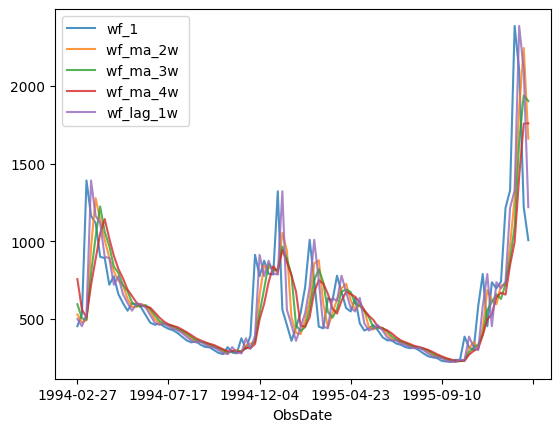

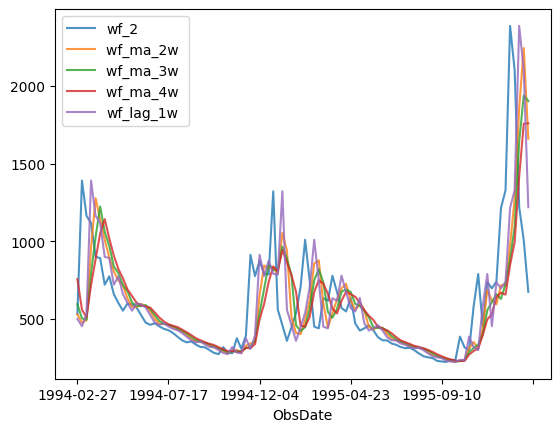

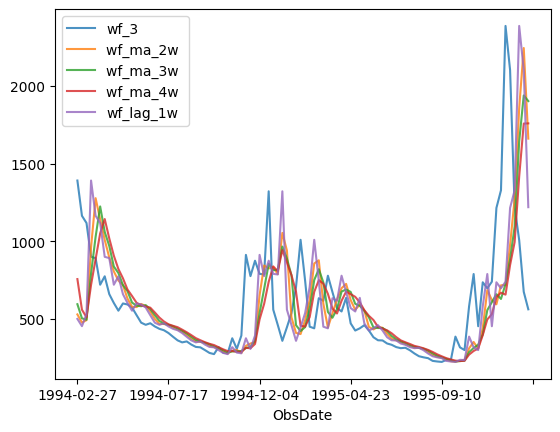

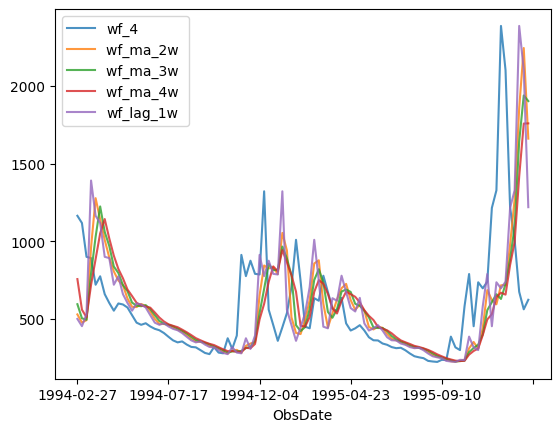

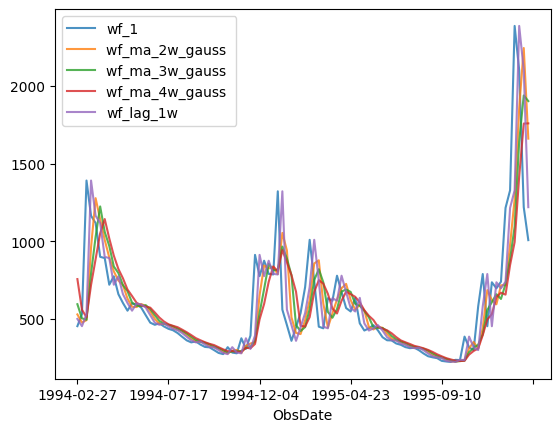

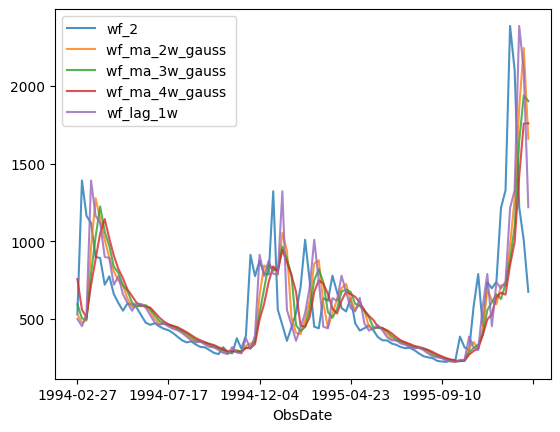

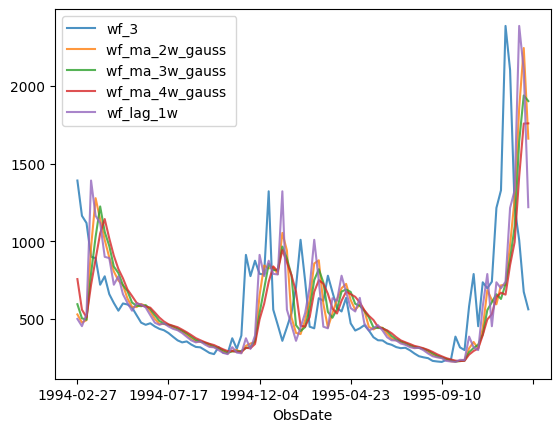

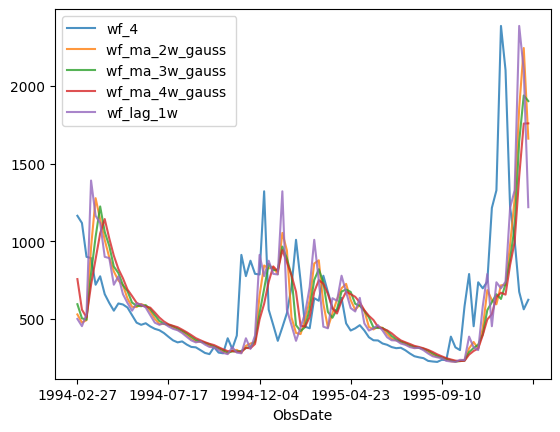

In [15]:
ma_variant = [
    "",
    "_gauss",
]

for variant_name in ma_variant:
    for week_val in range(1,5):
        plotting_df = pd.DataFrame()
        plotting_df[f"wf_{week_val}"] =  dataset_baseline["train"][f"water_flow_week{week_val}"]

        for ma_range in [2,3,4]:
            print(dataset_baseline["train"][f"water_flow_ma_{ma_range}w_lag_1w{variant_name}"].shape)
            plotting_df[f"wf_ma_{ma_range}w{variant_name} "] =  dataset_baseline["train"][f"water_flow_ma_{ma_range}w_lag_1w{variant_name}"]

        plotting_df[f"wf_lag_1w"] = dataset_baseline["train"][f"water_flow_lag_1w"]

        print(f"Week {week_val} preds on mobile average and lagged value")
        plotting_df[25000:25100].plot(alpha=0.8)